# Leaky Integrate-and-Fire(LIF) Neurons
The brain uses spikes for computation.
Integrate-and-Fire(IF) neurons integrate spike trains with somatic voltage in time domain, and "fires" if the
somatic voltage crosses some threshold.
Biological neurons have been shown to "leak" voltage.
LIF neurons incorporate said phenomenon such that the somatic voltage decays exponentially in time.
I could not find literature on whether there exists some advantage in using LIF neurons in lieu of IF neurons,
but intuitively, such leakage would imply greater temporal resolution, which would probably be beneficial.

In [54]:
import Pkg; Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/Projects/simple_nn_simulator/Project.toml`
  No Changes to `~/Projects/simple_nn_simulator/Manifest.toml`


In [50]:
function lif(tau=50, t1=20, t2=40, t3=60, w=0.5, threshold=1.0, reset=0.0)
    times = sort!([t1, t2, t3], rev=true)
    
    duration = 100
    dt = 0.1
    alpha = exp(-dt/tau)
    V_rec = Vector{Float64}()
    V = 0.0
    T = [0.:1.:round(duration/dt);] .* dt
    spikes = Vector{Float64}()
    
    for t in T
        append!(V_rec, V)
        V *= alpha
        if !isempty(times) && t > times[end]
            V += w
            pop!(times)
        end
        append!(V_rec, V)
        if V > threshold
            V = reset
            append!(spikes, t)
        end
    end
    V_rec
end


lif (generic function with 8 methods)

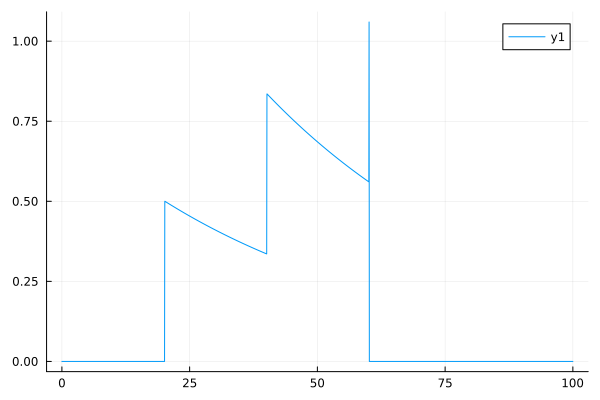

In [53]:
V_rec = lif()
x = range(0, 100, length(V_rec))
y = V_rec
plot(x, y)